### Imports

In [49]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master

     - 10kB 25.9MB/s
Requirement not upgraded as not directly required: numpy in /Users/ahemf/anaconda3/lib/python3.6/site-packages (from data-science-utils==0.1.15)
Requirement not upgraded as not directly required: pandas in /Users/ahemf/anaconda3/lib/python3.6/site-packages (from data-science-utils==0.1.15)
Requirement not upgraded as not directly required: pytz>=2011k in /Users/ahemf/anaconda3/lib/python3.6/site-packages (from pandas->data-science-utils==0.1.15)
Requirement not upgraded as not directly required: python-dateutil>=2 in /Users/ahemf/anaconda3/lib/python3.6/site-packages (from pandas->data-science-utils==0.1.15)
Requirement not upgraded as not directly required: six>=1.5 in /Users/ahemf/anaconda3/lib/python3.6/site-packages (from python-dateutil>=2->pandas->data-science-utils==0.1.15)
  Found existing installation: data-science-utils 0.1.14
    Uninstalling data-science-utils-0.1.14:
      Successfully uninstalled data-science-utils-0.1.14
  Running setup.py install fo


Latest Run: https://datanet-new.amazon.com/console?action=jobrun_details&jobrun_id=1528953536

save as `easy-ship_100seller_asin_sorted_by_seller.csv`

Ignore below

https://datanet.amazon.com/dw-platform/servlet/dwp/template/EtlViewExtractJobs.vm/job_profile_id/6167074

https://datanet.amazon.com/dw-platform/servlet/dwp/template/EtlViewExtractJobs.vm/job_profile_id/6167199

https://datanet.amazon.com/dw-platform/servlet/dwp/template/EtlViewExtractJobs.vm/job_profile_id/6167277

https://datanet.amazon.com/dw-platform/servlet/dwp/template/EtlViewExtractJobs.vm/job_profile_id/6167262

Download data by going to Job history and getting the data of the latest run.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from tldextract import extract
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils.dataframe import column as column_utils


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import lightgbm as lgb

np.set_printoptions(threshold=np.nan)
from fbprophet import Prophet



plt.rcParams["figure.figsize"] = (24,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import datetime
from scipy import signal
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn import linear_model



InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
def get_correlation_matrix_with_threshold(df,thres):
    df_corr=df.corr()
    columns_to_keep = set()
    np.fill_diagonal(df_corr.values, 0)
    for col in df_corr.columns:
        df1=df_corr[col]
        for index, value in df1.iteritems():
            try:
                if(abs(value)>thres):
                    columns_to_keep.add(col)
                    break
            except:
                print()
    df_corr2=df[list(columns_to_keep)].corr()
    df_corr2.shape
    df_corr2=df_corr2.sort_index()
    for col in df_corr2.columns:
        df_corr2.loc[np.abs(df_corr2[col])<thres,col]=0
    df_corr2 = df_corr2[df_corr2.index]
    return df_corr2

### Read Data

In [6]:
dateparse = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')
df = pd.read_csv("easy-ship_100seller_asin_sorted_by_seller.csv",encoding="utf-16",sep='\t', parse_dates=['weekstartdate'], date_parser=dateparse)
# df_asin = pd.read_csv("easy-ship_100asin.csv",encoding="utf-16",sep='\t', parse_dates=['weekstartdate'], date_parser=dateparse)
# df_gl = pd.read_csv("easy-ship_100gl.csv",encoding="utf-16",sep='\t', parse_dates=['weekstartdate'], date_parser=dateparse)
# df_seller = pd.read_csv("easy-ship_100seller.csv",encoding="utf-16",sep='\t', parse_dates=['weekstartdate'], date_parser=dateparse)

In [7]:

df['weekstartdate'].max()
df['weekstartdate'].min()

# df['gv_sale_ratio'] = df['glance_view_count']/(df['target']+1)
# df['seller_gv_sale_ratio'] = df['total_glance_views_cw']/(df['target']+1)
# df['bb_gv_sale_ratio'] = df['total_buybox_glance_views_cw']/(df['target']+1)

# np.corrcoef(df_single['bb_gv_sale_ratio'].shift(6).fillna(0),df_single['target'])
# np.corrcoef(df_single['glance_view_count'].shift(6).fillna(0),df_single['target'])

# df[['total_glance_views_cw','total_buybox_glance_views_cw','glance_view_count','gv_sale_ratio','seller_gv_sale_ratio','bb_gv_sale_ratio']].corr()
# df_utils.count_nulls(df[['total_glance_views_cw','total_buybox_glance_views_cw','glance_view_count','gv_sale_ratio','seller_gv_sale_ratio','bb_gv_sale_ratio']])
# df_utils.column_summaries(df[['total_glance_views_cw','total_buybox_glance_views_cw','glance_view_count','gv_sale_ratio','seller_gv_sale_ratio','bb_gv_sale_ratio']])

# df_utils.drop_columns_safely(df,['total_glance_views_cw','total_buybox_glance_views_cw','glance_view_count'],inplace=True)
# date_before = datetime.date(2015, 12, 31) # YYYY MM DD
# df=df[df["weekstartdate"]>date_before]
# df_asin=df_asin[df_asin["weekstartdate"]>date_before]
# df_gl=df_gl[df_gl["weekstartdate"]>date_before]
# df_seller=df_seller[df_seller["weekstartdate"]>date_before]

Timestamp('2018-03-26 00:00:00')

Timestamp('2015-03-02 00:00:00')

Trimming Most recent and most last week since these will not have full 7 day data

In [9]:
def trim_extreme_weeks(df):
    latestWeek = df['weekstartdate'].max()
    earliestWeek = df['weekstartdate'].min()
    df_trimmed = df.drop(df[(df['weekstartdate']==latestWeek) | (df['weekstartdate']==earliestWeek)].index)
    return df_trimmed

df = trim_extreme_weeks(df)
# df_asin = trim_extreme_weeks(df_asin)
# df_seller = trim_extreme_weeks(df_seller)
# df_gl = trim_extreme_weeks(df_gl)
    

Dropping some useless columns

In [11]:
df.shape
df_utils.drop_specific_cols(df,suffix='_lw',inplace=True)
# df_utils.drop_specific_cols(df_asin,suffix='_lw',inplace=True)
# df_utils.drop_specific_cols(df_seller,suffix='_lw',inplace=True)
# df_utils.drop_specific_cols(df_gl,suffix='_lw',inplace=True)

df_utils.drop_columns_safely(df,['Units','curr_merchant_class',
                                 'total_ordered_units',
                                 'prime_eligible_gv_count','any_ft_gv_count','amzn_instock_gv_count',
                                 'merchant_customer_id','s_pos_by_order','s_negs_by_order','s_negs','s_pos',
                                 'week_start_date','week_start','product_tier_id',
                                 'gl_count','gv_metrics_asin','launch_date',
                                 'product_available_day','instock_status',
 'current_merchant_status',],inplace=True)
# df_utils.drop_columns_safely(df_asin,['Units','curr_merchant_class',
#  'current_merchant_status',],inplace=True)
# df_utils.drop_columns_safely(df_seller,['Units','curr_merchant_class',
#  'current_merchant_status',],inplace=True)
# df_utils.drop_columns_safely(df_gl,['Units','curr_merchant_class',
#  'current_merchant_status',],inplace=True)
# df.shape

(433154, 57)

In [12]:
df['non_zero_promo'] = df['avg_promo_amount']>0
df['non_zero_promo']=df['non_zero_promo'].astype(int)
df.groupby(['non_zero_promo']).agg(['count'])[['target']]

df.groupby(['non_zero_promo']).agg(['mean'])[['target']]

df['non_zero_discount'] = df['maximum_discount_percent']>0
df['non_zero_discount']=df['non_zero_discount'].astype(int)

df.groupby(['non_zero_discount']).agg(['count'])[['target']]

df.groupby(['non_zero_discount']).agg(['mean'])[['target']]

,target
,count
non_zero_promo,
0,423988
1,9166


,target
,mean
non_zero_promo,
0,4.352012
1,11.368536


,target
,count
non_zero_discount,
0,411880
1,21274


,target
,mean
non_zero_discount,
0,3.834294
1,17.398515


### EDA

Finding Seller Asin Pairs with most data

In [14]:


def get_sorted_df(df,groupby_cols,time_col,value_col,top_n=50):
    df_grouped = df.sort_values(by=[time_col]).groupby(groupby_cols)
    df_grouped_sorted = df_grouped[value_col].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False,False])
    top_n=np.min([df_grouped_sorted.shape[0],top_n])
    plist = list()
    for i in range(0,top_n):
        tupl = df_grouped_sorted.iloc[i].name
        plist.append((tupl[0],tupl[1]))
    return (df_grouped,df_grouped_sorted,plist)
df_grouped,df_grouped_sorted,top_list = get_sorted_df(df,['sellerid', 'ASIN','gl'],'weekstartdate','target')

df_grouped_sorted.shape
df_grouped_sorted[df_grouped_sorted['count']>100].shape
df_grouped_sorted[df_grouped_sorted['count']>150].shape
    

(47426, 2)

(414, 2)

(26, 2)

In [15]:
def find_top_n_correlated_pairs(df,groupby_cols=['sellerid', 'ASIN'],time_col='weekstartdate',
            value_col='target',top_n=5,available_data_points=100,corr_thres=0.6):
    df_grouped = df.sort_values(by=[time_col]).groupby(groupby_cols)
    df_grouped_sorted = df_grouped[value_col].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False,False])
    df_grouped_sorted = df_grouped_sorted[df_grouped_sorted['count']>=available_data_points]
    values = {}
    top_n=np.min([df_grouped_sorted.shape[0],top_n])
    total_pairs = df_grouped_sorted.shape[0]
    idx = pd.date_range(df[time_col].min(), df[time_col].max(), freq='7D')
    for i in range(0,total_pairs):
        tupl = df_grouped_sorted.iloc[i].name
        df_bestSeller = df_grouped.get_group(tupl)[[value_col, time_col]]
        df_bestSeller.set_index(time_col, inplace=True)
        tsSparse=df_bestSeller[value_col]
    
        ts = tsSparse.reindex(idx, fill_value=0)
        values[str(tupl[0])+"_"+str(tupl[1])] = ts.values
    value_frame = pd.DataFrame(values)
    corr_frame = get_correlation_matrix_with_threshold(value_frame,corr_thres)
    np.fill_diagonal(corr_frame.values, 0)
    all_correlated_pairs = {}
    for column in corr_frame.columns:
        def mapper(string):
            splitted = string.split('_')
            return [int(splitted[0]),splitted[1]]
        cf = corr_frame[[column]]
        cf = cf[cf[column]>=corr_thres]
        cf=cf.sort_values(by=[column],ascending=[False]).head(top_n)
        correlated_pairs = list(map(mapper,cf.index.values))
        all_correlated_pairs[column] = correlated_pairs
    return all_correlated_pairs
corr_pairs=find_top_n_correlated_pairs(df)




        

In [16]:
def get_correlated_pair_for_seller_asin(sellerid,asin):
    key = str(sellerid)+"_"+asin
    if key in corr_pairs:
        return corr_pairs[key]
    else:
        return []
get_correlated_pair_for_seller_asin(7474466325,'B000I23TTE')

[[8202489135, 'B00FS892R6'],
 [8010912935, 'B00MW1YM22'],
 [8202489135, 'B00FS88JF2']]

This function only tries to find lost sales due to possible OOS. This has no use in rest of file

In [441]:
def estimate_benefits(df,groupby_cols=['sellerid', 'ASIN'],time_col='weekstartdate',
            value_col='target',price_col='merchant_avg_sale_price',top_n=1000):
    df_grouped = df.sort_values(by=[time_col]).groupby(groupby_cols)
    df_grouped_sorted = df_grouped[value_col].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False,False])
    total_benefit = 0
    top_n=np.min([df_grouped_sorted.shape[0],top_n])
    for i in range(0,top_n):
        tupl = df_grouped_sorted.iloc[i].name
        df_bestSeller = df_grouped.get_group(tupl)[[value_col, time_col,price_col]]
        
        df_bestSeller.set_index(time_col, inplace=True)
        
        tsSparse=df_bestSeller[value_col]
        idx = pd.date_range(tsSparse.index[0], tsSparse.index[len(tsSparse)-1], freq='7D')
        
        ts = tsSparse.reindex(idx, fill_value=0)
        
        tsSparsePrice = df_bestSeller[price_col]

        
        tsPrice = tsSparsePrice.reindex(idx, fill_value=tsSparsePrice.mean())
        
        
        estimate_df = ts.to_frame()
        estimate_df['price'] = tsPrice
        estimate_df['target_n-1'] = estimate_df['target'].shift(1)
        estimate_df['ewma_mean'] = pd.ewma(estimate_df['target_n-1'],span=4)
        zero_df = estimate_df[estimate_df['target']==0]
        zero_df['benefit'] = zero_df['ewma_mean'] * zero_df['price']

        total_benefit=np.nan_to_num(total_benefit)
        cur_benefit = np.nan_to_num(np.sum(zero_df['benefit'].fillna(zero_df['benefit'].mean())))
        total_benefit = total_benefit+cur_benefit
        
    return total_benefit
        
estimate_benefits(df)      
        

25102924.667773105

In [2]:
def view_single_series(df,sellerid,asin,
                       columns=[
                               'avg_promo_amount',
                               'target']):
    df_single = df[(df['sellerid']==sellerid)&(df['ASIN']==asin)]
    df_single = df_single.sort_values(by=['weekstartdate'],ascending=[False])
    df_single.set_index('weekstartdate', inplace=True)
    
    plist=list()
    plt.rcParams["figure.figsize"] = (24,12)
    for column in columns:
        ts=df_single[column]+1
        p, = plt.plot(ts.index, ts,label=column)
        plist.append(p)
    plt.title("Seller: %s ASIN: %s" % (sellerid,asin))
    plt.legend(handles=plist)
    plt.ylabel('Measures')
    plt.yscale('log',basey=10)
    plt.xlabel('Date')
    
    plt.show()
    plt.rcParams["figure.figsize"] = (24,4)
    
    return df_single
# df_single=view_single_series(df,8893697025,'B00SEO1IA0');
# df_single[['maximum_discount_percent','target']].corr()

In [1]:
def view_multiple_series(df,groupby_cols=['sellerid', 'ASIN'],time_col='weekstartdate',
            value_col='target',top_n=5):
    df_grouped = df.sort_values(by=[time_col]).groupby(groupby_cols)
    df_grouped_sorted = df_grouped[value_col].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False,False])
    values = {}
    top_n=np.min([df_grouped_sorted.shape[0],top_n])
    for i in range(0,top_n):
        tupl = df_grouped_sorted.iloc[i].name
        df_single=view_single_series(df,tupl[0],tupl[1]);
        
        


`plot_ts` can be used to plot the top n time series, it can plot the actual series,periodogram, log of actual series, exponential moving average, year and quaterly mean and a secondary column to see correlation with the main series

Iter: 0, ['sellerid', 'ASIN'] (10059582625, 'B00SYC6N2K') url: https://www.amazon.in/dp/B00SYC6N2K


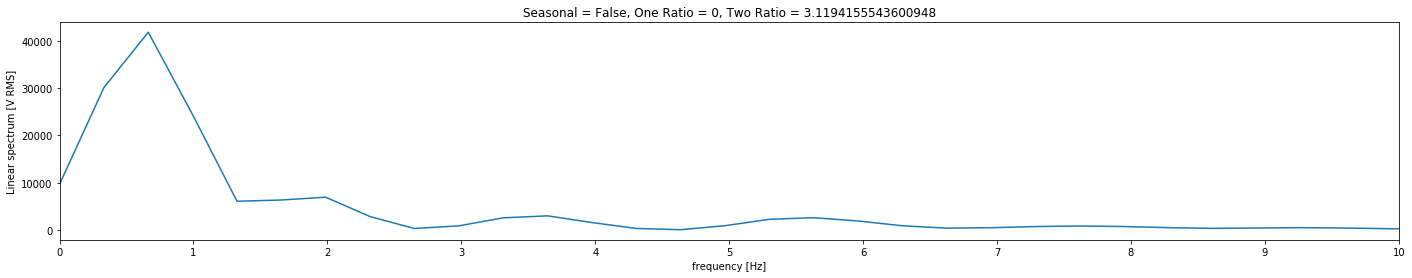

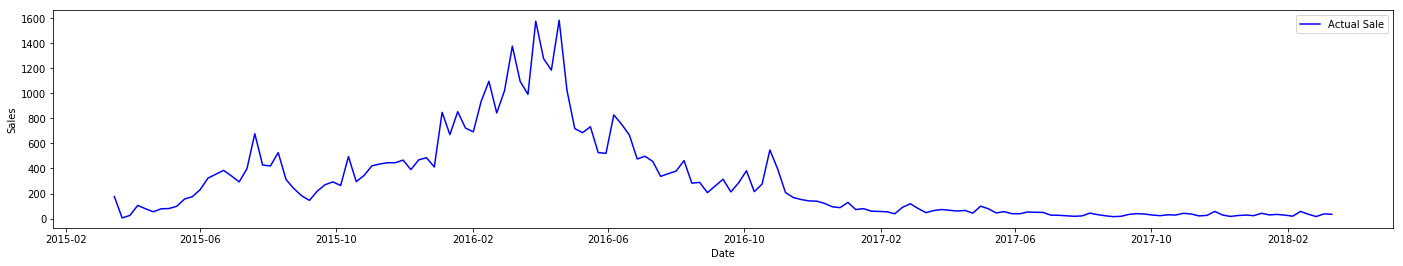

Iter: 1, ['sellerid', 'ASIN'] (8893697025, 'B00SEO1IA0') url: https://www.amazon.in/dp/B00SEO1IA0


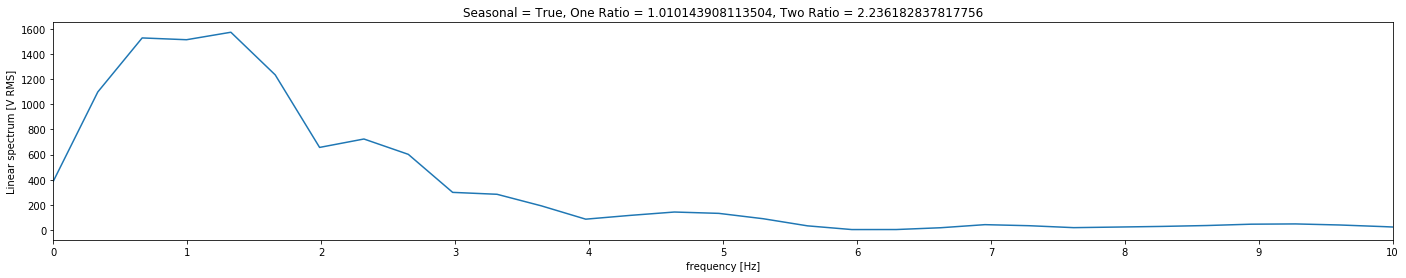

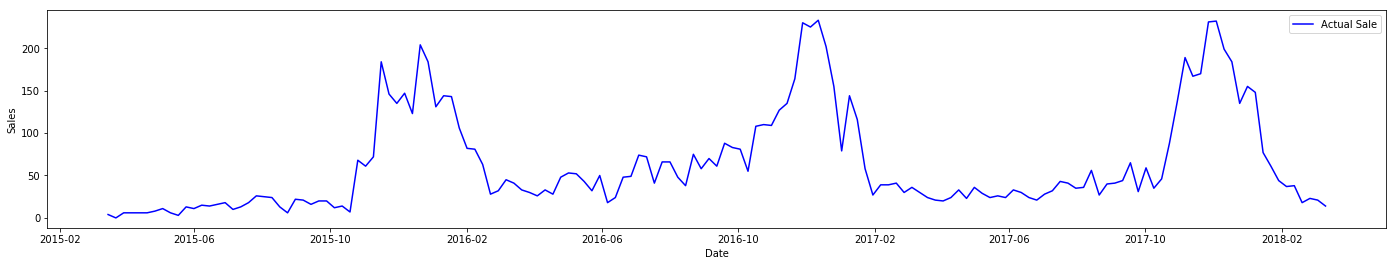

Iter: 2, ['sellerid', 'ASIN'] (8893697025, 'B00SENMH2Y') url: https://www.amazon.in/dp/B00SENMH2Y


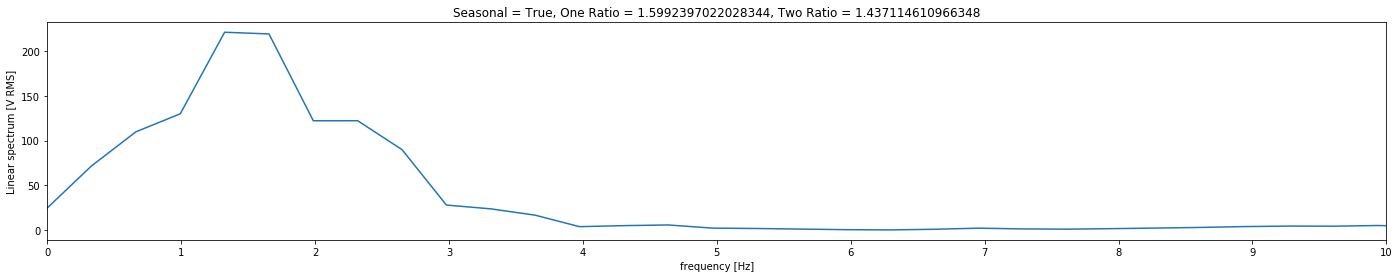

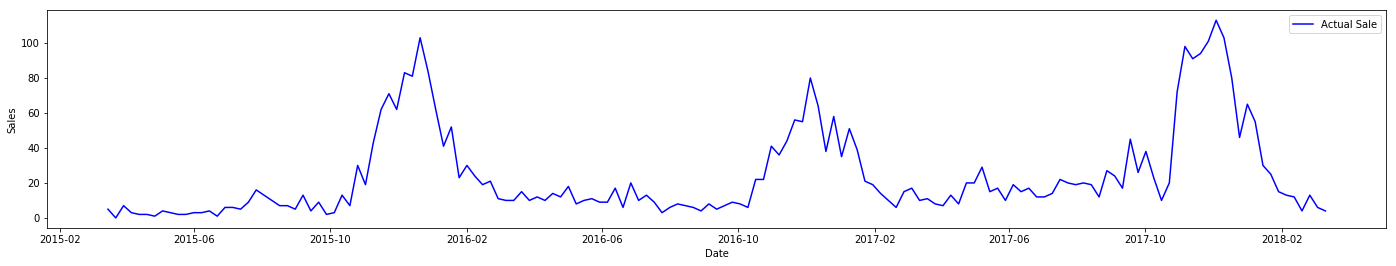

Iter: 3, ['sellerid', 'ASIN'] (8010912935, 'B00HH4HFZK') url: https://www.amazon.in/dp/B00HH4HFZK


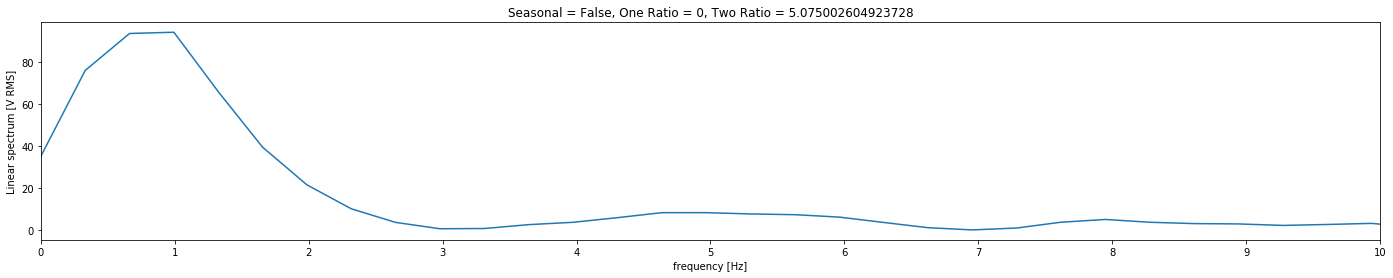

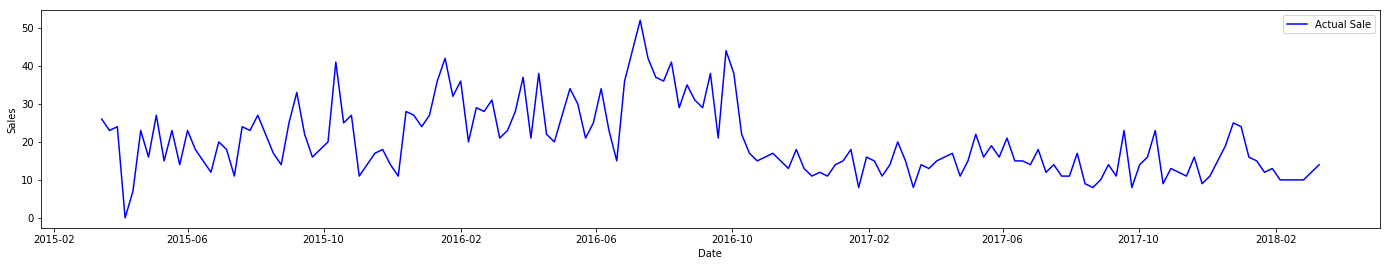

Iter: 4, ['sellerid', 'ASIN'] (7054050125, 'B00RGTOEZA') url: https://www.amazon.in/dp/B00RGTOEZA


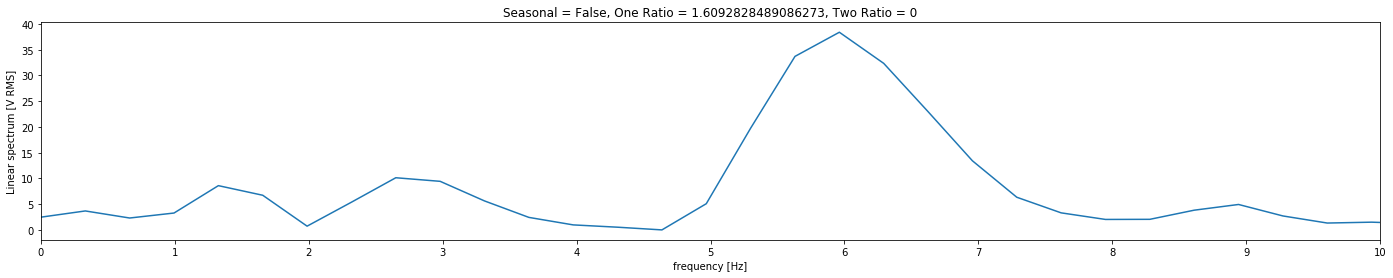

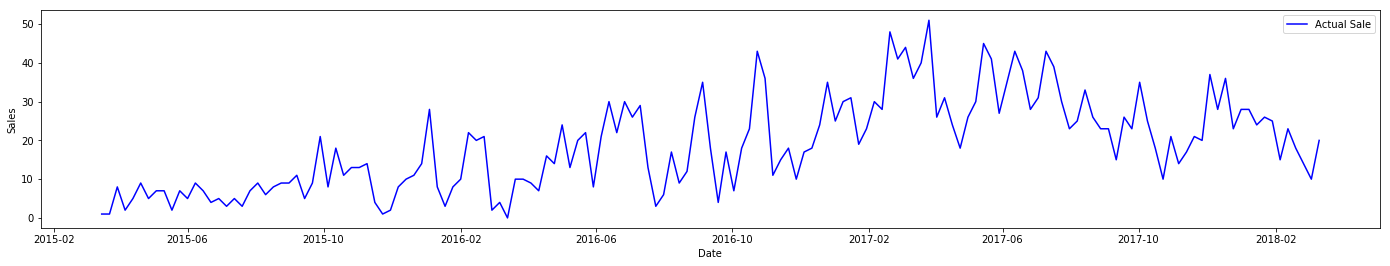

In [17]:
def plot_ts(df,groupby_cols=['sellerid', 'ASIN'],time_col='weekstartdate',
            value_col='target',actual_plot=True,cent_change_plot=False,log_plot=False,diff_plot=False,ewma=False,ewma_interval=4,
            year_mean=False,quarter_mean=False,quarter_sum=False,month_sum=False,periodogram=False,secondary_col=None,top_n=5):
    df_grouped = df.sort_values(by=[time_col]).groupby(groupby_cols)
    df_grouped_sorted = df_grouped[value_col].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False,False])
    values = {}
    top_n=np.min([df_grouped_sorted.shape[0],top_n])
    idx = pd.date_range(df[time_col].min(), df[time_col].max(), freq='7D')
    for i in range(0,top_n):
        tupl = df_grouped_sorted.iloc[i].name
        print("Iter: %s, %s %s url: https://www.amazon.in/dp/%s" %(i,groupby_cols,tupl,tupl[1]))
        df_bestSeller = df_grouped.get_group(tupl)[[value_col, time_col]]
        if(secondary_col is not None):
            df_bestSeller = df_grouped.get_group(tupl)[[value_col,secondary_col, time_col]]
        
        df_bestSeller.set_index(time_col, inplace=True)
        tsSparse=df_bestSeller[value_col]
        
        # idx = pd.date_range(tsSparse.index[0], tsSparse.index[len(tsSparse)-1], freq='7D')
    
        ts = tsSparse.reindex(idx, fill_value=0)
        if(periodogram):
            diff = np.diff(ts.values)
            diff = np.insert(diff, 0, 0., axis=0)
            pgr=np.asarray(ts.values)
            #pgr[pgr<160]=0
            #pgr[pgr>160]=160
            f, Pxx_spec = signal.periodogram(pgr, 52, 'flattop', scaling='spectrum',detrend='linear')
            spectral_df = pd.DataFrame({"f":f,"I":Pxx_spec})
            intensity_below_one = max(spectral_df[(spectral_df["f"]<0.9)&(spectral_df["f"]>0.6)]["I"].mean(),
                                      spectral_df[(spectral_df["f"]<0.9)&(spectral_df["f"]>0.8)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]<0.6)&(spectral_df["f"]>0.3)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]<0.9)&(spectral_df["f"]>0.5)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]<0.5)&(spectral_df["f"]>0.1)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]<0.8)&(spectral_df["f"]>0.4)]["I"].mean())
            intensity_at_one = spectral_df[(spectral_df["f"]>0.9)&(spectral_df["f"]<1.35)]["I"].mean()
            intensity_above_two = max(spectral_df[(spectral_df["f"]>1.75)&(spectral_df["f"]<2.5)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]>2.5)&(spectral_df["f"]<3)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]>2.05)&(spectral_df["f"]<3)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]>3)&(spectral_df["f"]<3.5)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]>3.5)&(spectral_df["f"]<4)]["I"].mean(),
                                     spectral_df[(spectral_df["f"]>3)&(spectral_df["f"]<4)]["I"].mean())
            
            intensity_ratio = intensity_at_one/intensity_below_one
            intensity_ratio_two = intensity_at_one/intensity_above_two
            
            if(intensity_ratio<0.9):
                intensity_ratio=0
            if(intensity_ratio_two<0.9):
                intensity_ratio_two=0
            
            combined_intensity_ratio = (intensity_ratio*intensity_ratio_two)/(intensity_ratio+intensity_ratio_two+1e-5)
            plt.figure()
            plt.xticks(np.arange(min(f), max(f)+1, 1))
            
            #plt.semilogy(f, Pxx_spec)
            #plt.semilogy(f, np.sqrt(Pxx_spec))
            plt.plot(f, Pxx_spec)
            plt.xlim(0,10)
            plt.title("Seasonal = %s, One Ratio = %s, Two Ratio = %s" % (combined_intensity_ratio>0.1,intensity_ratio,intensity_ratio_two))
            plt.xlabel('frequency [Hz]')
            plt.ylabel('Linear spectrum [V RMS]')
            plt.show()
        
        
        plist = list()
        values[str(tupl)] = ts.values
        if(actual_plot):
            p, = plt.plot(ts.index, ts, 'b',label="Actual Sale")
            plist.append(p)
            if(secondary_col is not None):
                ts_secondary=df_bestSeller[secondary_col].reindex(idx, fill_value=0)
                if(ts_secondary.mean()>2*ts.mean()):
                    ts_secondary=np.log1p(ts_secondary)
                elif(20*ts_secondary.mean()<ts.mean()):
                    ts_secondary=ts_secondary*20
                p, = plt.plot(ts_secondary.index, ts_secondary, 'g',label=secondary_col)
                plist.append(p)
        if(year_mean):
            year_group = lambda dt: dt.year
            #ts_mean_year = ts.groupby(year_group).mean()
            ts_mean_year = ts.groupby(year_group).transform('mean')
            p, = plt.plot(ts_mean_year.index,ts_mean_year,'k--',label="Yearly Mean")
            plist.append(p)
        if(quarter_mean):
            quarter_group = lambda dt: str(dt.year)+"_"+str(dt.quarter)
            ts_mean_quarter = ts.groupby(quarter_group).transform('mean')
            p, = plt.plot(ts_mean_quarter.index,ts_mean_quarter,'m--',label="Quarterly Mean")
            plist.append(p)
        if(quarter_sum):
            quarter_group = lambda dt: str(dt.year)+"_"+str(dt.quarter)
            ts_mean_quarter = ts.groupby(quarter_group).transform('sum')
            p, = plt.plot(ts_mean_quarter.index,ts_mean_quarter,'y--',label="Quarterly Sum")
            plist.append(p)
        if(month_sum):
            quarter_group = lambda dt: str(dt.year)+"_"+str(dt.month)
            ts_mean_quarter = ts.groupby(quarter_group).transform('sum')
            p, = plt.plot(ts_mean_quarter.index,ts_mean_quarter,'r--',label="Monthly Mean")
            plist.append(p)
        if(log_plot):
            p, = plt.plot(ts.index, 10*np.log1p(ts), 'y',label="Log of Actual Sale")
            plist.append(p)
        if(diff_plot):
            diff = np.diff(ts.values)
            diff = np.insert(diff, 0, 0., axis=0)
            p, = plt.plot(ts.index, diff, 'r',label="1st Differential")
            plist.append(p)
        if(cent_change_plot):
            diff = np.diff(ts.values)
            diff = np.insert(diff, 0, 0., axis=0)
            cent_change = 10* diff/ts.shift(1).fillna(1)
            p, = plt.plot(ts.index, cent_change, 'r',label="1st Differential")
            plist.append(p)
        if(ewma):
            ewma_vals = ts.ewm(span=ewma_interval).mean().values
            p, = plt.plot(ts.index, ewma_vals, 'c',label="%s Day EWMA" % ewma_interval)
            plist.append(p)
        plt.legend(handles=plist)
        plt.ylabel('Sales')
        plt.xlabel('Date')
        plt.show()
    return pd.DataFrame(values).corr()

corr_df = plot_ts(df,actual_plot=True,diff_plot=False,ewma=False,year_mean=False,quarter_mean=False,top_n=5,periodogram=True)
# corr_df = plot_ts(df[df['gl']==193],actual_plot=True,cent_change_plot=False,diff_plot=False,
#                   ewma=False,year_mean=False,quarter_mean=False,month_sum=False,quarter_sum=False,periodogram=False)
# corr_df = plot_ts(df_with_fest,actual_plot=True,secondary_col='Festival_or_not',diff_plot=False,ewma=False,year_mean=False,quarter_mean=False,log_plot=False,top_n=5)
# corr_df = plot_ts(df[df['gl']==194],actual_plot=False,diff_plot=True,ewma=False,year_mean=False,quarter_mean=False,periodogram=True)
corr_df;

Plotting the top 2 GL to see its trend

['gl'] 193


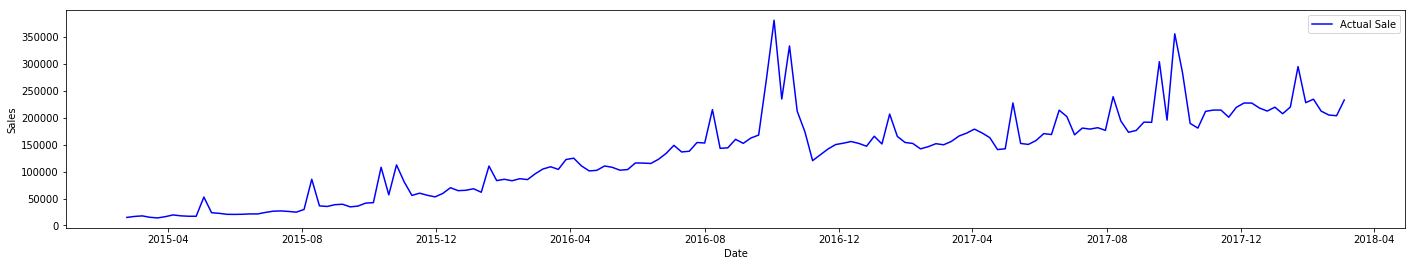

,193
193,1.0


In [11]:
plot_ts(df_gl,groupby_cols=['gl'],actual_plot=True,time_col='weekstartdate',value_col='target',top_n=1,periodogram=False,diff_plot=False)

Plotting top 5 ASIN to see their trend

### Removing Corr Columns

Showing correlated columns above given threshold of 0.8 correlation

In [18]:
get_correlation_matrix_with_threshold(df,0.8)

,Product Group Code,bad_asins,canceled_order_count_cw,category_code,gl,glance_view_count,month_of_year,no_bullets_asin_count_cw,no_desc_asin_count_cw,no_image_asin_count_cw,no_item_type_asin_count_cw,offering_count_cw,offers_per_order,prime_customer_gv_count,refunds_cw,subcategory_code,target,total_buybox_glance_views_cw,total_glance_views_cw,total_gms_cw,total_unique_customers,units_ordered_cw,week_of_year
Product Group Code,1.000000,0.000000,0.000000,0.923972,0.917223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.919848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bad_asins,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.991339,0.874936,0.819379,0.991662,0.987525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875697,0.000000,0.000000,0.000000,0.000000
canceled_order_count_cw,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.912339,0.000000,0.000000,0.923288,0.000000,0.870433,0.000000,0.943659,0.000000
category_code,0.923972,0.000000,0.000000,1.000000,0.903824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gl,0.917223,0.000000,0.000000,0.903824,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.899574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
glance_view_count,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_of_year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996545
no_bullets_asin_count_cw,0.000000,0.991339,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.886545,0.000000,0.972328,0.969774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.839247,0.000000,0.000000,0.000000,0.000000
no_desc_asin_count_cw,0.000000,0.874936,0.000000,0.000000,0.000000,0.000000,0.000000,0.886545,1.000000,0.000000,0.812111,0.803916,0.842006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
no_image_asin_count_cw,0.000000,0.819379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.842656,0.832361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Removing Columns with Columns above 0.8 correlation. We remove those columns which have correlation above 0.8, dropping the column with more nulls

In [19]:
df.shape
_,cols = df_utils.remove_correlated_pairs(df,0.8)
cols=list(set(cols)-set(['total_buybox_glance_views_cw','total_glance_views_cw','glance_view_count','subcategory_code']))
print("To be Removed Columns:")
cols


(433154, 48)

To be Removed Columns:


['no_desc_asin_count_cw',
 'gl',
 'category_code',
 'no_bullets_asin_count_cw',
 'canceled_order_count_cw',
 'month_of_year',
 'units_ordered_cw',
 'total_gms_cw',
 'no_item_type_asin_count_cw',
 'no_image_asin_count_cw',
 'total_unique_customers',
 'offering_count_cw']

In [20]:
df_utils.drop_columns_safely(df,cols,inplace=True)
print("Current Columns")
df_utils.get_column_names(df)
df.shape

Current Columns


['ASIN',
 'Product Group Code',
 'avg_promo_amount',
 'bad_asins',
 'canceled_ord_incr',
 'cancelled_per_order',
 'glance_view_count',
 'gms_incr',
 'gms_per_order',
 'has_fba_offering',
 'is_bb_cnt_per_order',
 'is_buybox_qualified_count_cw',
 'late_ships_cw',
 'maximum_discount_percent',
 'merchant_avg_sale_price',
 'merchant_total_sales',
 'negative_feedbacks_cw',
 'negative_feedbacks_per_order',
 'non_zero_discount',
 'non_zero_promo',
 'offers_per_order',
 'prevweekstartdate',
 'prime_customer_gv_count',
 'refunds_cw',
 'seller_cancels_cw',
 'seller_cancels_incr',
 'sellerid',
 'subcategory_code',
 'target',
 'total_bb_v_per_order',
 'total_buybox_glance_views_cw',
 'total_glance_views_cw',
 'week_of_month',
 'week_of_year',
 'weekstartdate',
 'year']

(433154, 36)

### Modelling

In [21]:
# _per_order means the metric has been divided by number of orders for that week for that seller
columns = [
'bad_asins',
'canceled_ord_incr',
'cancelled_per_order', # Cancelled count divided by number of orders
'dist_sess_cnt_per_order',
'gms_incr',
'gms_per_order',
'is_bb_cnt_per_order',
'is_buybox_qualified_count_cw',
'late_ships_cw',
'merchant_avg_sale_price',
'month_of_year',
'negative_feedbacks_cw',
'negative_feedbacks_per_order',
'offers_per_order',
's_negs',
'seller_cancels_cw',
'total_bb_v_per_order',
'week_of_month',
'year',
'weekstartdate',
'target']


# Add previous quarter mean as a feature
# quarter_group = lambda dt: dt.quarter
# ts_mean_quarter = ts.groupby(quarter_group).transform('mean')
# p, = plt.plot(ts_mean_quarter.index,ts_mean_quarter,'m',label="Quarterly Mean")

In [22]:
#df_test = df[(df['sellerid']==9003306035)&(df['ASIN']=="B00IF0B9V6")][columns]

columns = [
'non_zero_promo',
'non_zero_discount',
'bad_asins',
'canceled_ord_incr',
'cancelled_per_order',
'glance_view_count',
'gms_incr',
'gms_per_order',
'has_fba_offering',
'is_bb_cnt_per_order',
'is_buybox_qualified_count_cw',
'late_ships_cw',
'merchant_total_sales',
'negative_feedbacks_cw',
'negative_feedbacks_per_order',
'offers_per_order',
'prime_customer_gv_count',
'refunds_cw',
'seller_cancels_cw',
'seller_cancels_incr',
'total_bb_v_per_order',
'total_buybox_glance_views_cw',
'total_glance_views_cw',
'merchant_avg_sale_price',
'week_of_month',
'weekstartdate',
'week_of_year',
'year',
'target']

In [23]:
def train_and_test(df,seller_asin_pairs,columns,num_weeks=52,detrend=False,plot_actual=False,model_type='xgboost'):
    models = list()
    errs = list()
    errs_ewma = list()
    df_importance = None
    for seller,asin in seller_asin_pairs:
        print("For Seller %s and ASIN %s:" %(seller,asin))
        df_test = df[(df['sellerid']==seller)&(df['ASIN']==asin)][columns]
        
        df_test = df_test.sort_values(by=['weekstartdate'])

        
        idx = pd.date_range(df['weekstartdate'].min(), df['weekstartdate'].max(), freq='7D')
        df_bestSeller=df_test.set_index('weekstartdate', inplace=False)
        tsSparse=df_bestSeller['target']    
        ts = tsSparse.reindex(idx, fill_value=0)
        if(plot_actual):
            p, = plt.plot(ts.index, ts, 'b',label="Actual Sale")
            plt.legend(handles=[p])
            plt.ylabel('Sales')
            plt.xlabel('Date')
            plt.show()

        if(detrend):
            diff = np.diff(ts.values)
            diff = np.insert(diff, 0, 0., axis=0)
            ts = pd.Series(diff,ts.index)
            df_temp = pd.DataFrame({"target2":ts.values,"weekstartdate":ts.index.values})
            df_temp = df_test.merge(df_temp,on="weekstartdate",how='left')
            df_test["unmodified_target"]=df_test["target"]
            df_test["target"] = df_temp["target2"].values # since index of 2 dataframes are not same `df_test["target"] = df_temp["target2"]` uses index
            if(plot_actual):
                p, = plt.plot(ts.index, ts, 'b',label="Diff of Sale")
                plt.legend(handles=[p])
                plt.ylabel('Diff Sales')
                plt.xlabel('Date')
                plt.show()
        
        df_test['target_n-1'] = df_test['target'].shift(1)
        df_test['target_n-2'] = df_test['target'].shift(2)
        df_test['target_n-3'] = df_test['target'].shift(3)
        df_test['target_n-4'] = df_test['target'].shift(4)
        df_test['target_n-5'] = df_test['target'].shift(5)
        df_test['target_n-6'] = df_test['target'].shift(6)
        df_test['target_n-1_by_n-2'] = df_test['target_n-1']/df_test['target_n-2']
        
        df_test['merchant_total_sales'] = df_test['merchant_total_sales'].shift(1)
        
        df_test['non_zero_discount'] = df_test['non_zero_discount'].shift(1)
        df_test['non_zero_promo'] = df_test['non_zero_promo'].shift(1)
        
        shift_features = ['merchant_total_sales',
                          'total_glance_views_cw',
                          'total_buybox_glance_views_cw',
                          'prime_customer_gv_count',
                          'non_zero_promo',
                          'non_zero_discount',
                          'glance_view_count']
        for feature in shift_features:
            optimal_shift = 0
            optimal_corr = 0.0
            for shift_value in range(0,4):
                corr = np.corrcoef(df_test[feature].shift(shift_value).fillna(0),df_test['target'])
                
                corr = corr[0][1]
                corr=np.abs(corr)
                
                if(corr>optimal_corr):
                    optimal_shift=shift_value
                    optimal_corr = corr
            df_test[feature+"_"+str(optimal_shift)]=df_test[feature].shift(optimal_shift).fillna(0)
        
        df_test['merchant_total_sales'] = df_test['merchant_total_sales'].shift(1)
        
        df_test['target_2week_cent_change'] = (df_test['target_n-1'] - df_test['target_n-2'])/(df_test['target_n-2']+1)

        df_test['target_n-49'] = df_test['target'].shift(49)
        df_test['target_n-50'] = df_test['target'].shift(50)
        df_test['target_n-51'] = df_test['target'].shift(51)
        
        df_test['target_n-52'] = df_test['target'].shift(52)
        df_test['target_n-53'] = df_test['target'].shift(53)
        df_test['target_n-54'] = df_test['target'].shift(54)

        df_test['target_last_years_3week_avg'] = (df_test['target_n-49']+df_test['target_n-50']+df_test['target_n-51'])/3
        df_test['target_last_years_3week_avg_2'] = (df_test['target_n-52']+df_test['target_n-53']+df_test['target_n-54'])/3
        
        df_test['weekly_growth'] = df_test['target_n-1']/(df_test['target_n-2']+1)
        df_test['yearly_growth'] = (df_test['target_n-1']+df_test['target_n-2'])/(df_test['target_n-52']+df_test['target_n-53']+1)

        
        df_test['quarterly_rolling_mean'] = pd.rolling_mean(df_test['target_n-1'],12, min_periods=8)
        
        df_test['quarterly_rolling_mean_diff'] = df_test['quarterly_rolling_mean']-df_test['target_n-1']
        
        df_test['24_week_rolling_mean'] = pd.rolling_mean(df_test['target_n-1'],24, min_periods=16)
        
        df_test['52_week_high'] = pd.rolling_max(df_test['target_n-1'], window=52, min_periods=26)
        df_test['52_week_low'] = pd.rolling_min(df_test['target_n-1'], window=52, min_periods=26)
        
        df_test['8_week_high'] = pd.rolling_max(df_test['target_n-1'], window=8, min_periods=6)
        df_test['8_week_low'] = pd.rolling_min(df_test['target_n-1'], window=8, min_periods=6)
        df_test['merchant_avg_sale_price'] = df_test['merchant_avg_sale_price'].shift(1)
        
        for ewma_range in range(2,9):
            df_test['ewma_'+str(ewma_range)] = pd.ewma(df_test['target_n-1'],span=ewma_range)
            df_test['ewma_diff_'+str(ewma_range)]=df_test['ewma_'+str(ewma_range)]-df_test['target_n-1']
         
        
        df_test['ewma_diff_2_t'] =  np.abs(df_test['ewma_diff_2'])
        idmax = df_test['ewma_diff_2_t'].idxmax(axis=1)
        ewma_at_max_diff = df_test['ewma_2'].loc[idmax]
        diff_max = df_test['ewma_diff_2_t'].loc[idmax]
        
        max_ewma_ratio = 0.5*diff_max/ewma_at_max_diff
            
        df_test['upper_target'] = df_test['ewma_2']+(max_ewma_ratio*df_test['ewma_2'])
        df_test['lower_target'] = df_test['ewma_2']-(max_ewma_ratio*df_test['ewma_2'])
        df_utils.drop_columns_safely(df_test,['ewma_diff_2_t'],inplace=True)
        
        
            
        #df_utils.drop_specific_cols(df_test,suffix='per_order',inplace=True)
        features=list(df_utils.drop_columns_safely(df_test,['target','upper_target','lower_target','weekstartdate','unmodified_target']).columns.values)
        
        date_before = df_test["weekstartdate"].min() + timedelta(weeks=53)
        # date_before = datetime.date(2016, 3, 30) # YYYY MM DD
        df_test=df_test[df_test["weekstartdate"]>date_before]
        
        two_years_before_date = pd.datetime.now() - timedelta(weeks=105)
        df_test=df_test[df_test["weekstartdate"]>two_years_before_date]
        
        tdf = df_test.copy()
        tdf = tdf.reset_index(drop=True)
        predictions = list()
        actuals = list()
        ewmas = list()
        weekstartdate = list()
        if(detrend):
            unmodified = list()
            prediction_of_unmodified = list()
        errors = list()
        
        from xgboost import XGBRegressor
        from sklearn.neural_network import MLPRegressor
        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        
        
        if(model_type=='linear' or model_type=='dnn'):
            tdf[features] = tdf[features].fillna(0)
            tdf[features] = tdf[features].replace(np.inf,0)
            tdf[features] = tdf[features].replace(-np.inf,0)
            tdf[features] = scaler.fit_transform(tdf[features])
            
            
        
        from sklearn.model_selection import cross_val_predict
        model = None
        if(tdf.shape[0]-num_weeks<0):
            num_weeks = tdf.shape[0]-1
        for i in range(tdf.shape[0]-num_weeks,tdf.shape[0]):
            if(model_type=='xgboost'):
                model = XGBRegressor(max_depth=6, learning_rate=0.15,n_estimators=25,nthread=4,silent=True,missing=np.nan);
            elif(model_type=='linear'):
                model = linear_model.LinearRegression(n_jobs=-1)
            elif(model_type=='dnn'):
                model = MLPRegressor(hidden_layer_sizes=(50,25,5),max_iter=100,activation='tanh',learning_rate='adaptive')
            else:
                model = XGBRegressor(max_depth=6, learning_rate=0.15,n_estimators=25,nthread=4,silent=True,missing=np.nan);
                
            
            dft = tdf.head(i)
            X = dft[features].values
            y = dft['target'].values


            trn=model.fit(X,y);
            X_t=tdf[features].iloc[i].values.reshape((1, X.shape[1]))
            y_t=tdf['target'].iloc[i]
            y_p=model.predict(X_t)[0]
            if(not detrend):
                if(y_p<0):
                    y_p=0
                if(y_p>0 and y_p<1):
                    y_p=1
            
            ewma = tdf['ewma_2'].iloc[i]
            
            
            y_p_max_allowed,y_p_min_allowed = tdf['upper_target'].iloc[i],tdf['lower_target'].iloc[i]
            
            y_p = max(y_p,y_p_min_allowed)
            y_p = max(y_p,0)
            y_p = min(y_p,y_p_max_allowed)
            y_p=np.round(y_p)
                
            predictions.append(y_p)
            ewmas.append(ewma)
            actuals.append(y_t)
            weekstartdate.append(tdf['weekstartdate'].iloc[i])
            errors.append(y_p-y_t)
            df_i = None
            if(model_type=='xgboost' or model_type=='linear'):
                df_i = model_utils.feature_importance(model,dft,features)
            else:
                df_i = pd.DataFrame({'feature':['dnn'],'importance':[0]})
            if(df_importance is None):
                df_importance = df_i
                df_importance['counts'] = 1
            else:
                df_importance = df_importance.merge(df_i,on=['feature'],how='inner')
                df_importance['importance'] = df_importance['importance_x'] + df_importance['importance_y']
                df_importance['counts']=df_importance['counts']+1
                df_utils.drop_columns_safely(df_importance,['importance_x','importance_y'],inplace=True)
            if(detrend):
                unmodified.append(tdf['unmodified_target'].iloc[i])
                prediction_of_unmodified.append(tdf['unmodified_target'].iloc[i-1]+y_p)

        df_preds = None
        if(detrend):
            df_preds = pd.DataFrame({"actual":actuals,"predictions":predictions,
                                     "weekstartdate":weekstartdate,"errors":errors,"ewmas":ewmas,"unmodified_target":unmodified,"prediction_of_unmodified":prediction_of_unmodified})
        else:
            df_preds = pd.DataFrame({"actual":actuals,"predictions":predictions,
                                     "weekstartdate":weekstartdate,"errors":errors,"ewmas":ewmas})

        df_preds = df_preds.sort_values(by=['weekstartdate'])
        idx = pd.date_range(df_preds['weekstartdate'].min(), df_preds['weekstartdate'].max(), freq='7D')
        df_preds.set_index('weekstartdate', inplace=True)
        
        
        actual_col = "actual"
        prediction_col = "predictions"
        if(detrend):
            actual_col = "unmodified_target"
            prediction_col = "prediction_of_unmodified"
        
        tsSparseActual=df_preds[actual_col]    
        tsActual = tsSparseActual.reindex(idx, fill_value=0)
        
        tsSparse=df_preds[prediction_col]    
        ts = tsSparse.reindex(idx, fill_value=0)
        
        p1, = plt.plot(tsActual.index, tsActual,label="Actual Sales")
        p2, = plt.plot(ts.index, ts,label="Predictions")

        plt.legend(handles=[p1,p2])
        
        

        r_m_s_error = mean_squared_error(df_preds[actual_col], df_preds[prediction_col])**(.5)
        perc_error = (r_m_s_error*100.0)/df_preds[actual_col].mean()
        errs.append(perc_error)
        plt.title('With Model:  RMSE of %.3f for mean %.3f giving error %% of %.3f' % (r_m_s_error, df_preds[actual_col].mean(), perc_error))

        if(not detrend):
            r_m_s_error = mean_squared_error(df_preds[actual_col], df_preds['ewmas'])**(.5)
            perc_error = (r_m_s_error*100.0)/df_preds[actual_col].mean()
            errs_ewma.append(perc_error)
            
        
        models.append(model)
        plt.show()
    print(errs)
    print(errs_ewma)
    df_importance['importance'] = df_importance['importance']/df_importance['counts']
    df_utils.drop_columns_safely(df_importance,['counts'],inplace=True)
    return (df_preds,df_importance)
    
    





For Seller 8893697025 and ASIN B00SEO1IA0:


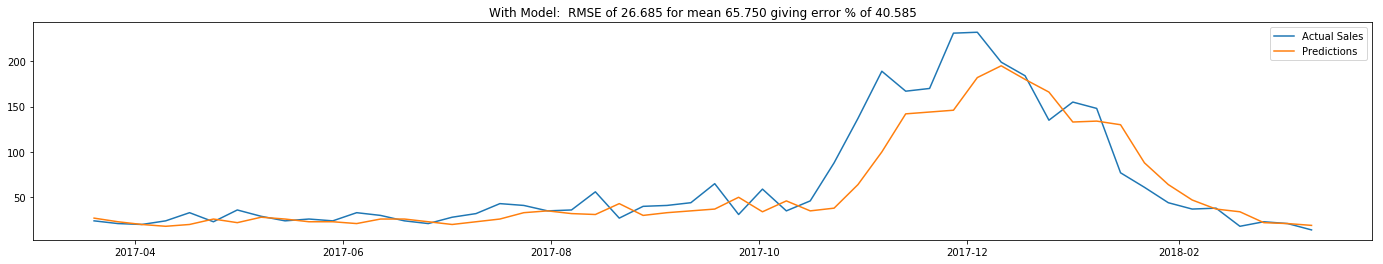

For Seller 8893697025 and ASIN B00SENMH2Y:


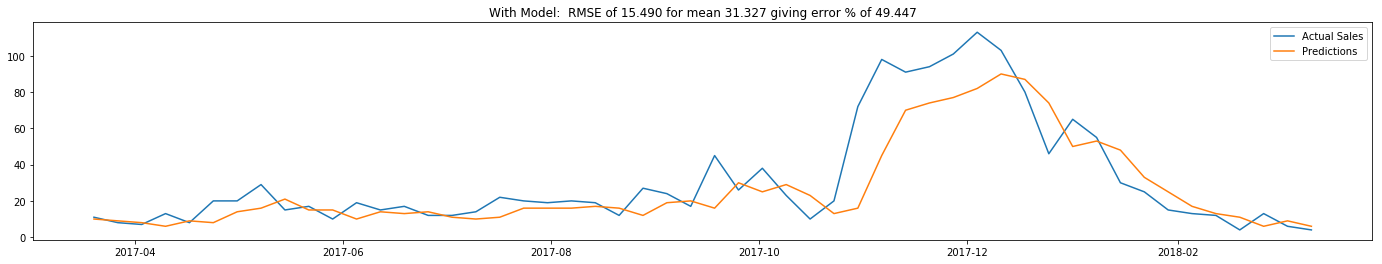

[40.5852007550073, 49.446513542541616]
[135.27144568338258, 133.75396160362425]


,feature,importance
0,dnn,0.0


In [24]:
df_preds,df_importance = train_and_test(df,top_list[:2],columns,52,False,model_type='dnn');

# df_preds,df_importance = train_and_test(df,[(10059582625,"B001CVJVCO"),(10059582625,"B0093KUYS6")],columns,52,True);
# df_preds = train_and_test([(9003306035,"B00IF0B9V6"),(7822343425,"B00W037VIO")],columns,52,False);
df_importance
# df_preds = train_and_test([(9003306035,"B00IF0B9V6"),(7822343425,"B00W037VIO")],columns,52,True);

### Adding Festivals

In [25]:
df_festivals = pd.read_csv("Festivals.csv")
df_festivals["Date"] = pd.to_datetime(df_festivals["Date"])


df_festivals = df_festivals.sort_values(by=["Date"])
df_fest_counts = df_festivals.groupby(["Festival"])[["Date"]].count()
df_fest_counts[df_fest_counts["Date"]<3]
df_festivals["weekstartdate"] = df_festivals['Date'] - df_festivals['Date'].dt.weekday.astype('timedelta64[D]')

def religious_festival_or_not(festival):
    festival = festival.lower()
    if("republic" in festival 
        or "gandhi" in festival 
        or "independence" in festival):
        return 0
    else:
        return 1
    
df_festivals["religious_festival_or_not"] = df_festivals["Festival"].apply(religious_festival_or_not)
df_festivals["Festival_or_not"] = 1

df_utils.drop_columns_safely(df_festivals,["Date","Festival"],inplace=True)

df_festivals.drop_duplicates(subset="weekstartdate",inplace=True)
df_festivals = df_festivals.sort_values(by=['weekstartdate'])
df_festivals['festival_next_week'] = df_festivals['Festival_or_not'].shift(-1)
df_festivals['festival_previous_week'] = df_festivals['Festival_or_not'].shift(1)
df_festivals.groupby(["weekstartdate"])[["religious_festival_or_not"]].count();

In [26]:
df_festivals = pd.read_csv("Festivals.csv")
df_festivals["Date"] = pd.to_datetime(df_festivals["Date"])


df_festivals = df_festivals.sort_values(by=["Date"])
df_fest_counts = df_festivals.groupby(["Festival"])[["Date"]].count()
df_fest_counts[df_fest_counts["Date"]<3]
df_festivals["weekstartdate"] = df_festivals['Date'] - df_festivals['Date'].dt.weekday.astype('timedelta64[D]')

def religious_festival_or_not(festival):
    festival = festival.lower()
    if("republic" in festival 
        or "gandhi" in festival 
        or "independence" in festival):
        return 0
    else:
        return 1
    
df_festivals["religious_festival_or_not"] = df_festivals["Festival"].apply(religious_festival_or_not)
df_festivals["Festival_or_not"] = 1

df_utils.drop_columns_safely(df_festivals,["Date","Festival"],inplace=True)

df_festivals.drop_duplicates(subset="weekstartdate",inplace=True)
df_festivals = df_festivals.sort_values(by=['weekstartdate'])
df_festivals['festival_next_week'] = df_festivals['Festival_or_not'].shift(-1)
df_festivals['festival_previous_week'] = df_festivals['Festival_or_not'].shift(1)
df_festivals.groupby(["weekstartdate"])[["religious_festival_or_not"]].count();

In [27]:
df_festivals = pd.read_csv("Festivals.csv")
df_festivals["Date"] = pd.to_datetime(df_festivals["Date"])


df_festivals = df_festivals.sort_values(by=["Date"])
df_fest_counts = df_festivals.groupby(["Festival"])[["Date"]].count()
df_fest_counts[df_fest_counts["Date"]<3]
df_festivals["weekstartdate"] = df_festivals['Date'] - df_festivals['Date'].dt.weekday.astype('timedelta64[D]')

def religious_festival_or_not(festival):
    festival = festival.lower()
    if("republic" in festival 
        or "gandhi" in festival 
        or "independence" in festival):
        return 0
    else:
        return 1
    
df_festivals["religious_festival_or_not"] = df_festivals["Festival"].apply(religious_festival_or_not)
df_festivals["Festival_or_not"] = 1

df_utils.drop_columns_safely(df_festivals,["Date","Festival"],inplace=True)

df_festivals.drop_duplicates(subset="weekstartdate",inplace=True)
df_festivals = df_festivals.sort_values(by=['weekstartdate'])
df_festivals['festival_next_week'] = df_festivals['Festival_or_not'].shift(-1)
df_festivals['festival_previous_week'] = df_festivals['Festival_or_not'].shift(1)
df_festivals.groupby(["weekstartdate"])[["religious_festival_or_not"]].count();

In [28]:
df_with_fest = df.merge(df_festivals,on='weekstartdate',how='left')

df_with_fest["religious_festival_or_not"].fillna(0,inplace=True)
df_with_fest["Festival_or_not"].fillna(0,inplace=True)

df_with_fest["festival_previous_week"].fillna(0,inplace=True)
df_with_fest["festival_next_week"].fillna(0,inplace=True)



In [29]:
fest_columns = ['religious_festival_or_not',
'Festival_or_not',
'festival_previous_week',
'festival_next_week']

fest_columns.extend(columns)

For Seller 8893697025 and ASIN B00SEO1IA0:


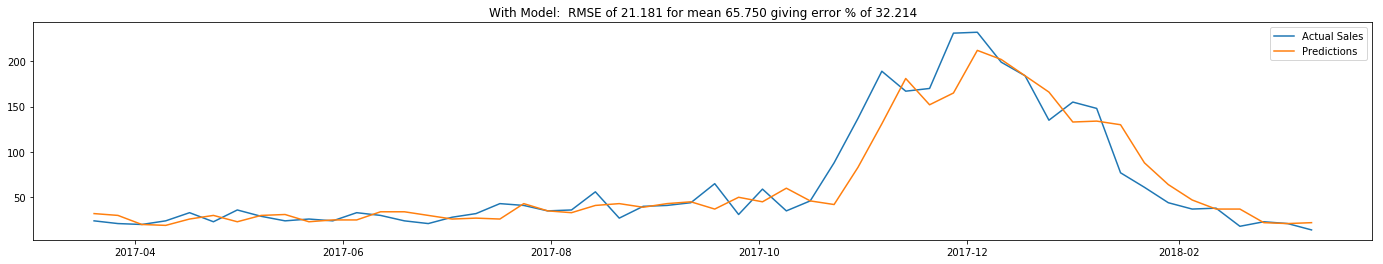

For Seller 8893697025 and ASIN B00SENMH2Y:


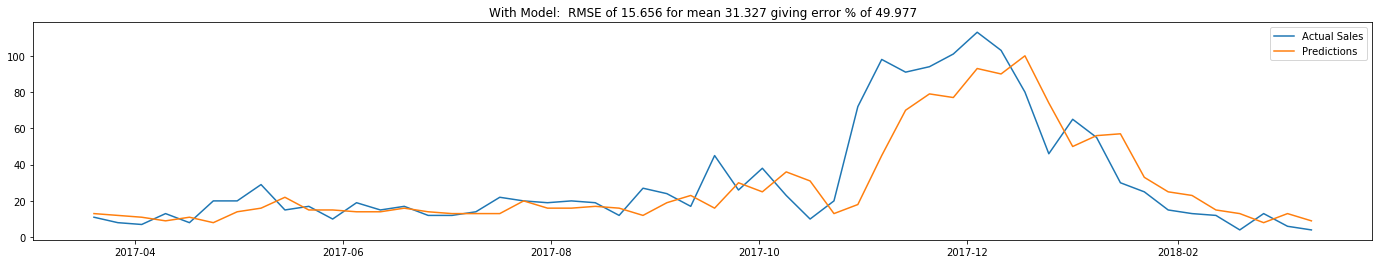

For Seller 7489150125 and ASIN B00MVKQOAC:


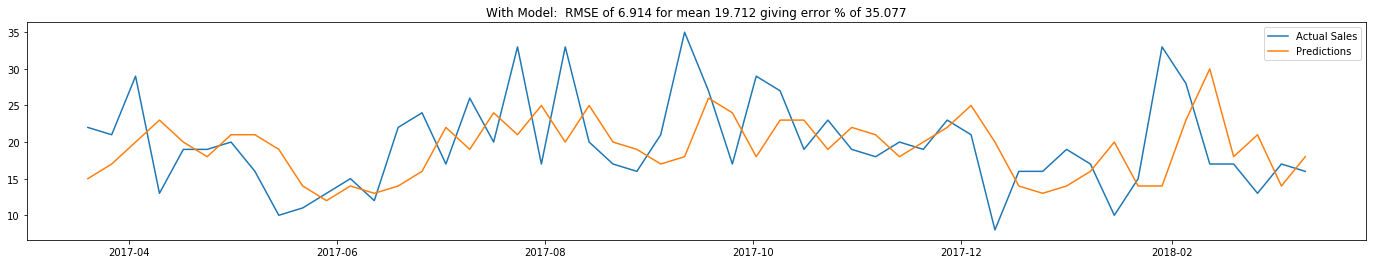

[32.214443441207479, 49.976696391556295, 35.077478618713208]
[38.095629885446598, 46.961608824687346, 35.149336977242314]


In [31]:
df_preds,df_importance = train_and_test(df_with_fest,top_list[:3],fest_columns,52,False,plot_actual=False);
df_importance;

### Transfer Learning

In [32]:
df_nn = df_with_fest.copy()
ohe_cols=['week_of_year','year','week_of_month']
categorical_cols=['religious_festival_or_not',
 'Festival_or_not',
 'festival_previous_week',
 'festival_next_week',
 'non_zero_promo',
 'non_zero_discount']
df_nn = pd.get_dummies(df_nn,columns=ohe_cols,prefix=ohe_cols,drop_first=True)
wy=df_utils.get_specific_cols(df_nn,prefix='week_of_year')
yy=df_utils.get_specific_cols(df_nn,prefix='year')
wm=df_utils.get_specific_cols(df_nn,prefix='week_of_month')
categorical_cols.extend(wy)
categorical_cols.extend(yy)
categorical_cols.extend(wm)

nn_columns = list(set(fest_columns)-set(ohe_cols))
nn_columns.extend(categorical_cols)
nn_columns = list(set(nn_columns))


In [47]:
def enrich_single_seller_asin(df,seller,asin,columns):
    df_test = df[(df['sellerid']==seller)&(df['ASIN']==asin)][columns]

    df_test = df_test.sort_values(by=['weekstartdate'])





    df_test['target_n-1'] = df_test['target'].shift(1)
    df_test['target_n-2'] = df_test['target'].shift(2)
    df_test['target_n-3'] = df_test['target'].shift(3)
    df_test['target_n-4'] = df_test['target'].shift(4)
    df_test['target_n-5'] = df_test['target'].shift(5)
    df_test['target_n-6'] = df_test['target'].shift(6)

    df_test['merchant_total_sales'] = df_test['merchant_total_sales'].shift(1)

    df_test['non_zero_discount'] = df_test['non_zero_discount'].shift(1)
    df_test['non_zero_promo'] = df_test['non_zero_promo'].shift(1)

    shift_features = ['merchant_total_sales',
                      'total_glance_views_cw',
                      'total_buybox_glance_views_cw',
                      'prime_customer_gv_count',
                      'non_zero_promo',
                      'non_zero_discount',
                      'glance_view_count']
    for feature in shift_features:
        optimal_shift = 0
        optimal_corr = 0.0
        for shift_value in range(0,4):
            corr = np.corrcoef(df_test[feature].shift(shift_value).fillna(0),df_test['target'])

            corr = corr[0][1]
            corr=np.abs(corr)

            if(corr>optimal_corr):
                optimal_shift=shift_value
                optimal_corr = corr
        df_test[feature+"_"+str(optimal_shift)]=df_test[feature].shift(optimal_shift).fillna(0)
        
    df_test['target_change'] = 100*(df_test['target'] - df_test['target_n-1'])/df_test['target_n-1']

    df_test['merchant_total_sales'] = df_test['merchant_total_sales'].shift(1)
    
    df_test['target_n-1_by_n-2'] = df_test['target_n-1']/df_test['target_n-2']

    df_test['target_2week_cent_change'] = (df_test['target_n-1'] - df_test['target_n-2'])/(df_test['target_n-2']+1)

    df_test['target_n-49'] = df_test['target'].shift(49)
    df_test['target_n-50'] = df_test['target'].shift(50)
    df_test['target_n-51'] = df_test['target'].shift(51)

    df_test['target_n-52'] = df_test['target'].shift(52)
    df_test['target_n-53'] = df_test['target'].shift(53)
    df_test['target_n-54'] = df_test['target'].shift(54)

    df_test['target_last_years_3week_avg'] = (df_test['target_n-49']+df_test['target_n-50']+df_test['target_n-51'])/3
    df_test['target_last_years_3week_avg_2'] = (df_test['target_n-52']+df_test['target_n-53']+df_test['target_n-54'])/3

    df_test['weekly_growth'] = df_test['target_n-1']/(df_test['target_n-2']+1)
    df_test['yearly_growth'] = (df_test['target_n-1']+df_test['target_n-2'])/(df_test['target_n-52']+df_test['target_n-53']+1)


    df_test['quarterly_rolling_mean'] = pd.rolling_mean(df_test['target_n-1'],12, min_periods=8)

    df_test['quarterly_rolling_mean_diff'] = df_test['quarterly_rolling_mean']-df_test['target_n-1']

    df_test['24_week_rolling_mean'] = pd.rolling_mean(df_test['target_n-1'],24, min_periods=16)

    df_test['52_week_high'] = pd.rolling_max(df_test['target_n-1'], window=52, min_periods=26)
    df_test['52_week_low'] = pd.rolling_min(df_test['target_n-1'], window=52, min_periods=26)

    df_test['8_week_high'] = pd.rolling_max(df_test['target_n-1'], window=8, min_periods=6)
    df_test['8_week_low'] = pd.rolling_min(df_test['target_n-1'], window=8, min_periods=6)
    df_test['merchant_avg_sale_price'] = df_test['merchant_avg_sale_price'].shift(1)

    for ewma_range in range(2,9):
        df_test['ewma_'+str(ewma_range)] = pd.ewma(df_test['target_n-1'],span=ewma_range)
        df_test['ewma_diff_'+str(ewma_range)]=df_test['ewma_'+str(ewma_range)]-df_test['target_n-1']


    df_test['ewma_diff_2_t'] =  np.abs(df_test['ewma_diff_2'])
    idmax = df_test['ewma_diff_2_t'].idxmax(axis=1)
    ewma_at_max_diff = df_test['ewma_2'].loc[idmax]
    diff_max = df_test['ewma_diff_2_t'].loc[idmax]

    max_ewma_ratio = 0.5*diff_max/ewma_at_max_diff

    df_test['upper_target'] = df_test['ewma_2']+(max_ewma_ratio*df_test['ewma_2'])
    df_test['lower_target'] = df_test['ewma_2']-(max_ewma_ratio*df_test['ewma_2'])
    df_utils.drop_columns_safely(df_test,['ewma_diff_2_t'],inplace=True)
    
    date_before = df_test["weekstartdate"].min() + timedelta(weeks=53)
    # date_before = datetime.date(2016, 3, 30) # YYYY MM DD
    df_test=df_test[df_test["weekstartdate"]>date_before]

    two_years_before_date = pd.datetime.now() - timedelta(weeks=105)
    df_test=df_test[df_test["weekstartdate"]>two_years_before_date]
    
    return df_test

def transfer_learning(df,seller_asin_pairs,columns,num_weeks=52,model_type='xgboost'):
    models = list()
    errs = list()
    errs_ewma = list()
    df_importance = None
    for seller,asin in seller_asin_pairs:
        print("For Seller %s and ASIN %s:" %(seller,asin))
        corr_pairs = get_correlated_pair_for_seller_asin(seller,asin)
        corr_pairs.append([seller,asin])
        
        df_incr_decr = None
        for seller,asin in corr_pairs:
            df_temp = enrich_single_seller_asin(df,seller,asin,columns)
            if(df_incr_decr is None):
                df_incr_decr = df_temp
            else:
                df_incr_decr = pd.concat([df_incr_decr, df_temp], ignore_index=True)
                
        
        scaler = RobustScaler()
        
        df_test = enrich_single_seller_asin(df,seller,asin,columns)
        
            
        #df_utils.drop_specific_cols(df_test,suffix='per_order',inplace=True)
        features=list(df_utils.drop_columns_safely(df_test,['target','upper_target','target_change','lower_target','weekstartdate','unmodified_target']).columns.values)
        columns_needing_scaling = list(set(features)-set(categorical_cols))
        
        inc_dec_model = MLPRegressor(hidden_layer_sizes=(80,40,20,10,),alpha=0.1,warm_start=True,max_iter=400,activation='relu',learning_rate='adaptive')
        

        df_incr_decr[features] = df_incr_decr[features].fillna(0)
        df_incr_decr[features] = df_incr_decr[features].replace(np.inf,0)
        df_incr_decr[features] = df_incr_decr[features].replace(-np.inf,0)
        

        if(df_test.shape[0]-num_weeks<0):
            num_weeks = df_test.shape[0]-1
        tdf = df_test.copy()
        tdf = tdf.reset_index(drop=True)
        
        date_before = tdf.iloc[tdf.shape[0]-num_weeks-1]['weekstartdate']
        df_incr_decr_train = df_incr_decr[df_incr_decr["weekstartdate"]<date_before]
        df_incr_decr_test = df_incr_decr[df_incr_decr["weekstartdate"]>=date_before]
        
        df_incr_decr_train[columns_needing_scaling] = scaler.fit_transform(df_incr_decr_train[columns_needing_scaling])
        df_incr_decr_test[columns_needing_scaling] = scaler.transform(df_incr_decr_test[columns_needing_scaling])
        
        tdf.fillna(0,inplace=True)

        tdf[features].fillna(0,inplace=True)
        tdf[features] = tdf[features].replace(np.inf,0)
        tdf[features] = tdf[features].replace(-np.inf,0)
        tdf[columns_needing_scaling] = scaler.transform(tdf[columns_needing_scaling])
        
        tdf_train = tdf[tdf["weekstartdate"]<date_before]
        X_inc_dec = tdf_train[features].values
        y_inc_dec = tdf_train['target_change'].values
        stacked_features = list(features)
        stacked_features.append('target_change')
        
        inc_dec_model.fit(X_inc_dec,y_inc_dec);
        
        
        model = MLPRegressor(hidden_layer_sizes=(10,5,),alpha=1,warm_start=True,max_iter=400,activation='tanh',learning_rate='adaptive')  
        X = df_incr_decr_train[stacked_features].values
        y = df_incr_decr_train['target'].values
        model.fit(X,y);
        
        X = tdf_train[stacked_features].values
        y = tdf_train['target'].values
        
        model.fit(X,y);
        y_pred_model = model.predict(X)
        print("Main Model: Train rmse : %s" %(mean_squared_error(y,y_pred_model)**0.5))
        
        

        X = df_incr_decr_train[features].values
        y = df_incr_decr_train['target_change'].values
        inc_dec_model.fit(X,y);
        
        y_train_predicted = inc_dec_model.predict(X)
        
        print("Incr Decr Model: Train rmse : %s" %(mean_squared_error(y,y_train_predicted)**0.5))
        
        X_t = df_incr_decr_test[features].values
        y_t = df_incr_decr_test['target_change'].values
        
        y_test_pred = inc_dec_model.predict(X_t)
        print("Incr Decr Model: Test rmse : %s" %(mean_squared_error(y_t,y_test_pred)**0.5))

        
        
        predictions = list()
        actuals = list()
        weekstartdate = list()
        errors = list()   
            
        date_current = None
        
        from sklearn.model_selection import cross_val_predict
        
        
        for i in range(tdf.shape[0]-num_weeks,tdf.shape[0]):
            
            
            date_current=tdf['weekstartdate'].iloc[i]
            df_incr_decr_train = df_incr_decr[(df_incr_decr["weekstartdate"]>=date_before)&(df_incr_decr["weekstartdate"]<date_current)]
            date_before = date_current
            
            X_m1 = df_incr_decr_train[features].values
            y_m1 = df_incr_decr_train['target_change'].values
            inc_dec_model.fit(X_m1,y_m1);
            
            
            
            dft_with_test = tdf.iloc[[i-1,i],:]
            dft_with_test['target_change'] = inc_dec_model.predict(dft_with_test[features].values)[0]
            dft = dft_with_test.head(1)
            dft_test = dft_with_test.tail(1)
            
            X = dft[stacked_features].values
            y = dft['target'].values


            model.fit(X,y);
            X_t=dft_test[stacked_features].values.reshape((1, X.shape[1]))
            tn_1 = dft_test['target_n-1'].values[0]
            target_change = dft_test['target_change'].values[0]
            y_t_m1 = np.asarray([tn_1 + target_change*tn_1/100.0])
            
            
            model.fit(X_t,y_t_m1);
            
            y_t=dft_test['target'].values[0]
            y_p=model.predict(X_t)[0]
            
            #print("incr_decr diff: %s Model Diff: %s"%(np.abs(y_t-y_t_m1[0]),np.abs(y_t-y_p)))
            
            if(y_p<0):
                y_p=0
            if(y_p>0 and y_p<1):
                y_p=1
            
            
            
            y_p_max_allowed,y_p_min_allowed = tdf['upper_target'].iloc[i],tdf['lower_target'].iloc[i]
            
            y_p = max(y_p,y_p_min_allowed)
            y_p = max(y_p,0)
            y_p = min(y_p,y_p_max_allowed)
            y_p=np.round(y_p)
                
            predictions.append(y_p)
            actuals.append(y_t)
            weekstartdate.append(tdf['weekstartdate'].iloc[i])
            errors.append(y_p-y_t)
            

        df_preds = None
        
        df_preds = pd.DataFrame({"actual":actuals,"predictions":predictions,
                                 "weekstartdate":weekstartdate,"errors":errors})

        df_preds = df_preds.sort_values(by=['weekstartdate'])
        idx = pd.date_range(df_preds['weekstartdate'].min(), df_preds['weekstartdate'].max(), freq='7D')
        df_preds.set_index('weekstartdate', inplace=True)
        
        
        actual_col = "actual"
        prediction_col = "predictions"
        
        tsSparseActual=df_preds[actual_col]    
        tsActual = tsSparseActual.reindex(idx, fill_value=0)
        
        tsSparse=df_preds[prediction_col]    
        ts = tsSparse.reindex(idx, fill_value=0)
        
        p1, = plt.plot(tsActual.index, tsActual,label="Actual Sales")
        p2, = plt.plot(ts.index, ts,label="Predictions")

        plt.legend(handles=[p1,p2])
        
        print(df_preds[actual_col])
        print(df_preds[prediction_col])

        r_m_s_error = model_utils.rmse(df_preds[actual_col], df_preds[prediction_col])
        perc_error = (r_m_s_error*100.0)/df_preds[actual_col].mean()
        errs.append(perc_error)
        plt.title('With Model:  RMSE of %.3f for mean %.3f giving error %% of %.3f' % (r_m_s_error, df_preds[actual_col].mean(), perc_error))
            
        
        models.append(model)
        plt.show()
    print(errs)
    return df_preds
    
    





For Seller 8893697025 and ASIN B00SEO1IA0:
Main Model: Train rmse : 91.1430313514
Incr Decr Model: Train rmse : 50.1392159249
Incr Decr Model: Test rmse : 59.5588385242
weekstartdate
2017-03-20     24
2017-03-27     21
2017-04-03     20
2017-04-10     24
2017-04-17     33
2017-04-24     23
2017-05-01     36
2017-05-08     29
2017-05-15     24
2017-05-22     26
2017-05-29     24
2017-06-05     33
2017-06-12     30
2017-06-19     24
2017-06-26     21
2017-07-03     28
2017-07-10     32
2017-07-17     43
2017-07-24     41
2017-07-31     35
2017-08-07     36
2017-08-14     56
2017-08-21     27
2017-08-28     40
2017-09-04     41
2017-09-11     44
2017-09-18     65
2017-09-25     31
2017-10-02     59
2017-10-09     35
2017-10-16     46
2017-10-23     88
2017-10-30    137
2017-11-06    189
2017-11-13    167
2017-11-20    170
2017-11-27    231
2017-12-04    232
2017-12-11    199
2017-12-18    184
2017-12-25    135
2018-01-01    155
2018-01-08    148
2018-01-15     77
2018-01-22     61
2018-01

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

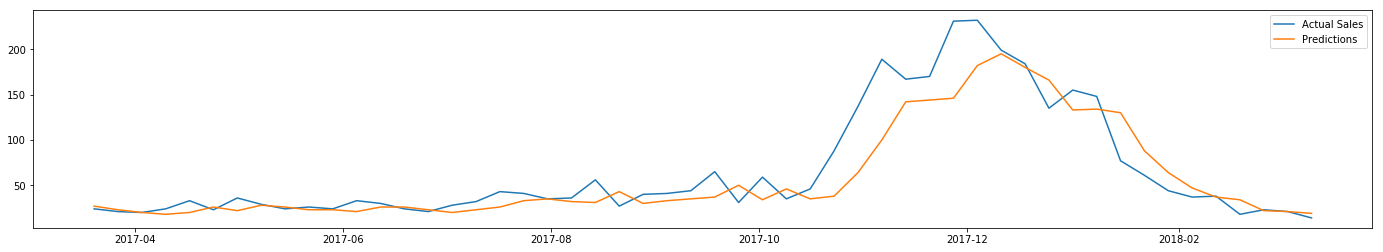

In [48]:
df_preds = transfer_learning(df_nn,top_list[:1],nn_columns,52,"dnn")


### Seasonal inspection

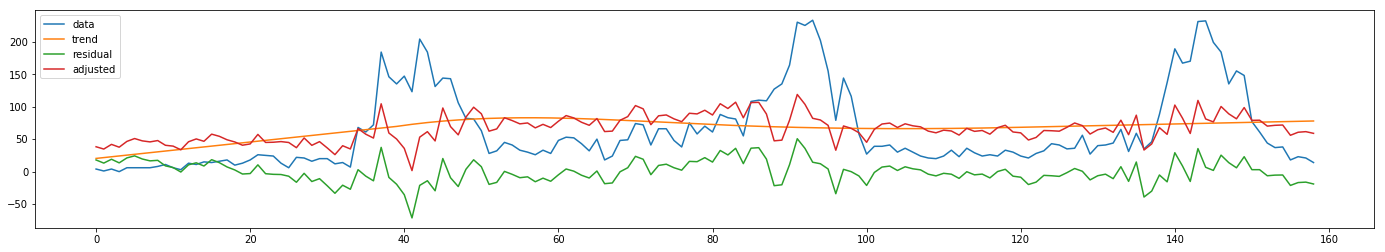

In [206]:
import math
import numpy as np
from seasonal import fit_seasons, adjust_seasons
import matplotlib.pyplot as plt

# make a trended sine wave
df_test=df[(df['sellerid']==8893697025)&(df['ASIN']=='B00SEO1IA0')]
idx = pd.date_range(df_test['weekstartdate'].min(), df_test['weekstartdate'].max(), freq='7D')
df_bestSeller=df_test.set_index('weekstartdate', inplace=False)
tsSparse=df_bestSeller['target']    
ts = tsSparse.reindex(idx, fill_value=0)

s = ts.values

# detrend and deseasonalize
seasons, trend = fit_seasons(s)
adjusted = adjust_seasons(s, seasons=seasons)
residual = adjusted - trend

# visualize results
plt.figure()
plt.plot(s, label='data')
plt.plot(trend, label='trend')
plt.plot(residual, label='residual')
plt.plot(adjusted, label='adjusted')
plt.legend(loc='upper left')

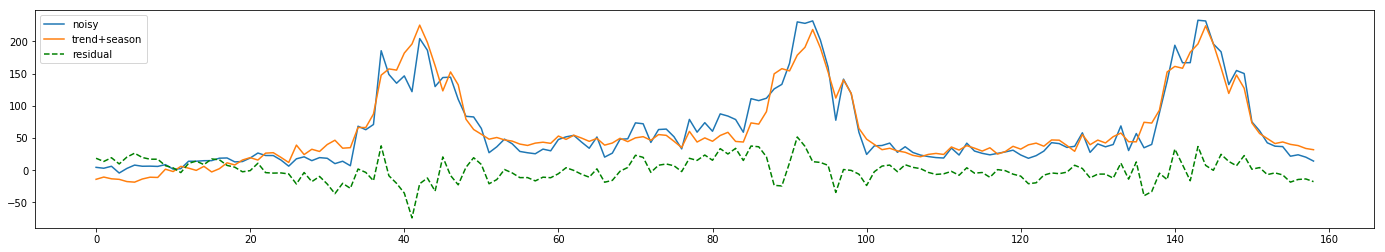

In [207]:
noisy = s + np.random.normal(0, 2, len(s))
seasons, trend = fit_seasons(noisy)
adjusted = adjust_seasons(noisy, seasons=seasons)
residual = adjusted - trend

plt.figure()
plt.plot(noisy, label='noisy')
plt.plot(noisy - residual, label='trend+season')
plt.plot(residual,'g--', label='residual')
plt.legend(loc='upper left')

### Things to consider further

- total_ordered_units of asin sold if too high then saturation possible.
- Use Min Max scaling for DNN
- GV Count [Done]
- Number of Sellers selling this asin
- Number of Asins this seller is selling
- Asin has retail offers [Done]
- Asin + Seller is Prime [Done]
- Last year what happened during the same festival
- Amazon sales data
- Search Ranking for terms that this asin comes under
- Number of Similar asins given by fba,retail n 3p merchants

#### Ensembles to consider

- Asin is seasonal or not
- Correlated Asins, train together to detect  increase or decrease or remain constant, percent increase or decrease
- Correlated Asins peak detection, zero detection 
- change point detection

#### Think about
- Model is memorising and saying if in last week value was high n ewma was high then value will be high now too
- See if model is missing only peaks or just random by seeing multiple of predictions
- Train single model on more than 1 ASIN
- LSTM

Range: 100, Num of Points: 1000, Total Classes: 2


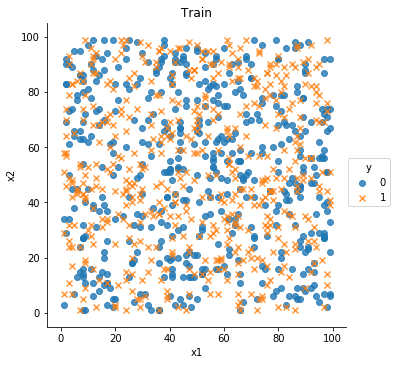

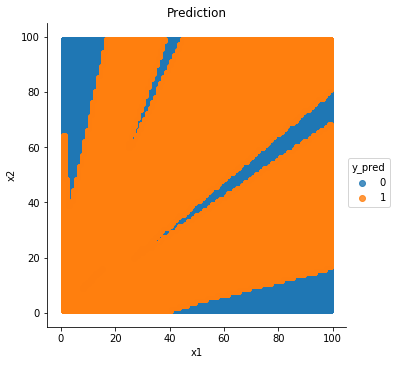

In [419]:
def plot_random(rng=100,points=1000,hues=2,fit_reg=False):
    print("Range: %s, Num of Points: %s, Total Classes: %s" %(rng,points,hues))
    x1=np.random.randint(1,rng,points)
    x2=np.random.randint(1,rng,points)
    y=np.random.randint(0,hues,points)

    df = pd.DataFrame({"x1":x1,"x2":x2,"y":y})

    g = sns.lmplot(x="x1", y="x2", hue="y", data=df,fit_reg=fit_reg,
                   markers=["o", "x"])
    plt.title('Train')

    plt.show()
    
    classifier = MLPClassifier(hidden_layer_sizes=(100,50,25,))
    X = df[['x1','x2']]
    y = df['y']
    classifier.fit(X,y)
    
    x1=np.random.randint(1,rng,points*100)
    x2=np.random.randint(1,rng,points*100)
    
    df_test = pd.DataFrame({"x1":x1,"x2":x2})
    
    X_t = df_test[['x1','x2']]
    df_test['y_pred'] = classifier.predict(X_t)
    
    g = sns.lmplot(x="x1", y="x2", hue="y_pred", data=df_test,fit_reg=fit_reg)
    plt.title('Prediction')

    plt.show()
    
plot_random(100,1000,2)



Range: 100, Num of Points: 100, Total Classes: 2


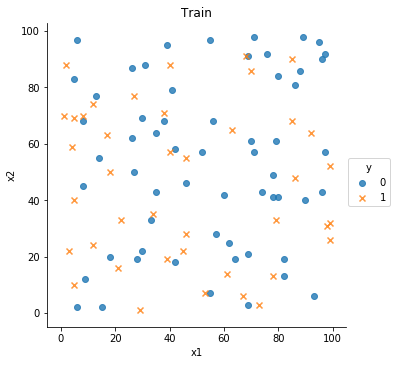

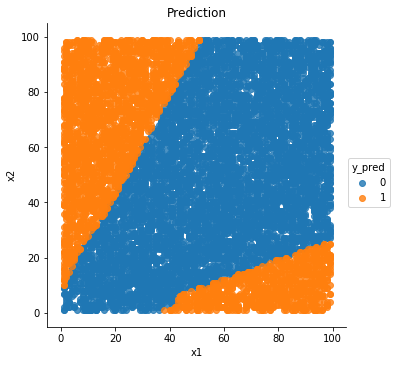

In [421]:
plot_random(100,100,2)


Range: 100, Num of Points: 10, Total Classes: 2


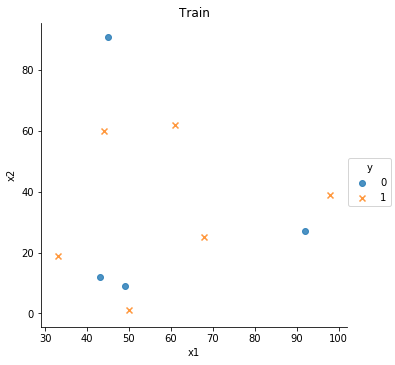

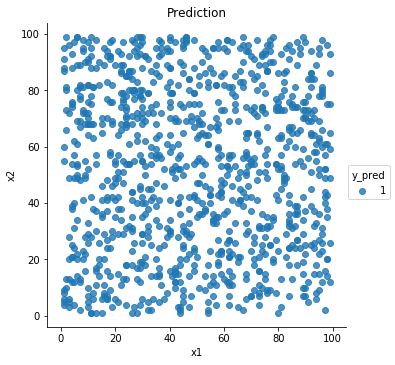

In [422]:
plot_random(100,10,2)

Range: 100, Num of Points: 10, Total Classes: 2


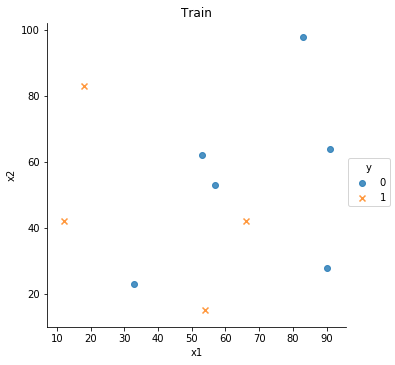

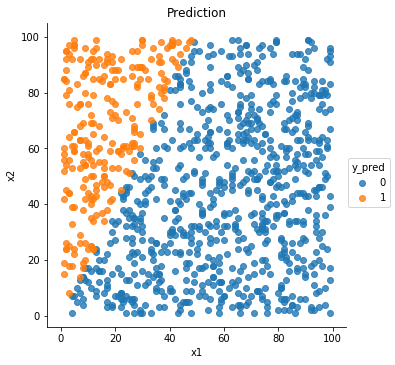

In [424]:
plot_random(100,10,2)